# Forest Cover Classification Using Neural Network

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Reading the dataset
data_set = pd.read_csv('covtype.csv')
data_set.shape

(581012, 55)

In [3]:
# Checking for null values in the dataset
data_set.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [4]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['Cover_Type'] - 1

In [5]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((435759, 54), (145253, 54))

In [6]:
# Scaling the features in the training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Further splitting the training set into training and validation subsets
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train,
                                                              y_train,
                                                              test_size=0.25, 
                                                              random_state=0)
X_train_nn.shape, X_val_nn.shape

((326819, 54), (108940, 54))

In [1]:
import keras
from keras.models import Sequential # type: ignore
from keras.layers import Input, Dense # type: ignore
from keras import optimizers

## ReLU Activation Function

In [9]:
# Designing the neural network
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(7, activation='softmax'))

In [10]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model1.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=100, batch_size=512, verbose=1)

Epoch 1/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6959 - loss: 0.7567 - val_accuracy: 0.7852 - val_loss: 0.5032
Epoch 2/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7959 - loss: 0.4790 - val_accuracy: 0.8220 - val_loss: 0.4251
Epoch 3/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8248 - loss: 0.4160 - val_accuracy: 0.8374 - val_loss: 0.3940
Epoch 4/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8412 - loss: 0.3798 - val_accuracy: 0.8506 - val_loss: 0.3562
Epoch 5/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8532 - loss: 0.3538 - val_accuracy: 0.8561 - val_loss: 0.3476
Epoch 6/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8636 - loss: 0.3307 - val_accuracy: 0.8684 - val_loss: 0.3213
Epoch 7/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8717 - loss: 0.3132 - val_accuracy: 0.8725 - val_loss: 0.3127
Epoch 8/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8787 - loss: 0.2978 - val_accu

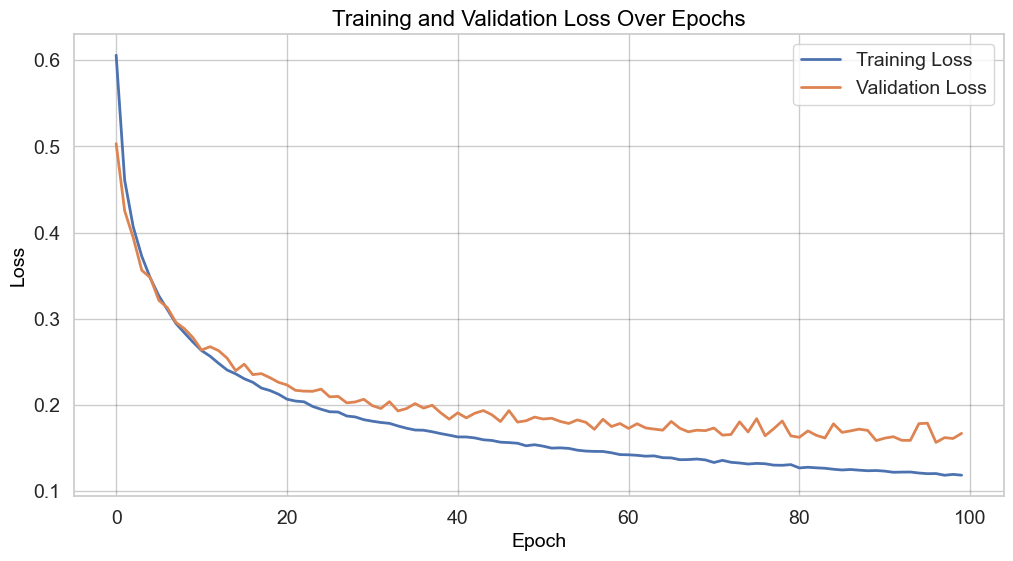

In [11]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

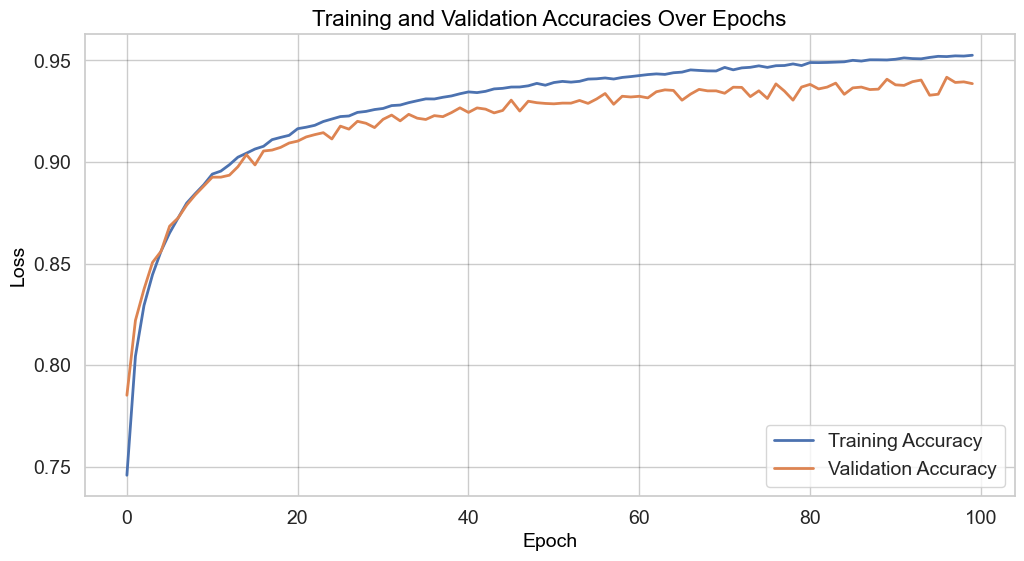

In [12]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [13]:
# Predictions for training and test sets
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

13618/13618 ━━━━━━━━━━━━━━━━━━━━ 7s 517us/step
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 3s 665us/step


In [14]:
# Convert predictions to class labels
y_train_pred_classes1 = y_train_pred1.argmax(axis=1)
y_test_pred_classes1 = y_test_pred1.argmax(axis=1)

# Training metrics
train_accuracy1 = accuracy_score(y_train, y_train_pred_classes1)
train_precision1 = precision_score(y_train, y_train_pred_classes1, average='macro')
train_recall1 = recall_score(y_train, y_train_pred_classes1, average='macro')
train_f1_1 = f1_score(y_train, y_train_pred_classes1, average='macro')

# Test metrics
test_accuracy1 = accuracy_score(y_test, y_test_pred_classes1)
test_precision1 = precision_score(y_test, y_test_pred_classes1, average='macro')
test_recall1 = recall_score(y_test, y_test_pred_classes1, average='macro')
test_f1_1 = f1_score(y_test, y_test_pred_classes1, average='macro')

In [15]:
print("Training Accuracy (in %):",round(train_accuracy1*100,3))
print("Training Precision (in %):",round(train_precision1*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall1*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_1*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy1*100,3))
print("Test Precision (in %):",round(test_precision1*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall1*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_1*100,3)) # type: ignore

Training Accuracy (in %): 95.01
Training Precision (in %): 92.683
Training Recall (in %): 91.618
Training F1 Score (in %): 92.078

Test Accuracy (in %): 93.997
Test Precision (in %): 90.922
Test Recall (in %): 89.501
Test F1 Score (in %): 90.138


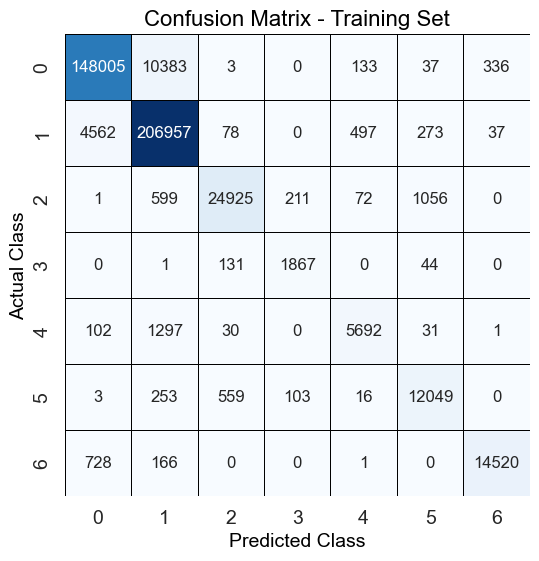

In [16]:
# Confusion matrix for training set
train_conf_matrix1 = confusion_matrix(y_train, y_train_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

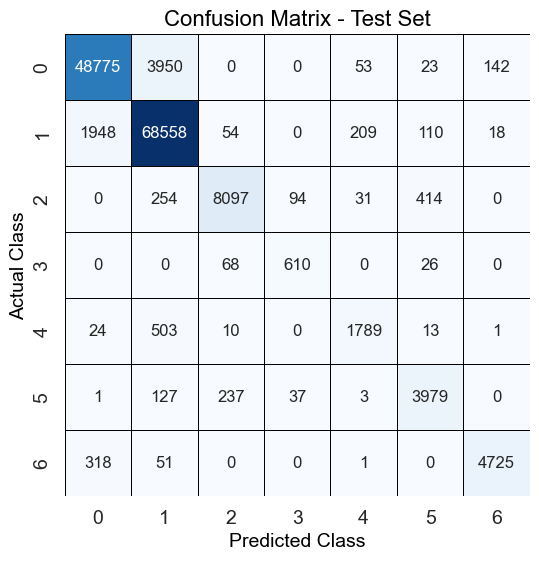

In [17]:
# Confusion matrix for test set
test_conf_matrix1 = confusion_matrix(y_test, y_test_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In the above confusion matrices, the labels have been zero-indexed (1 to 7 has been converted to 0 to 6)

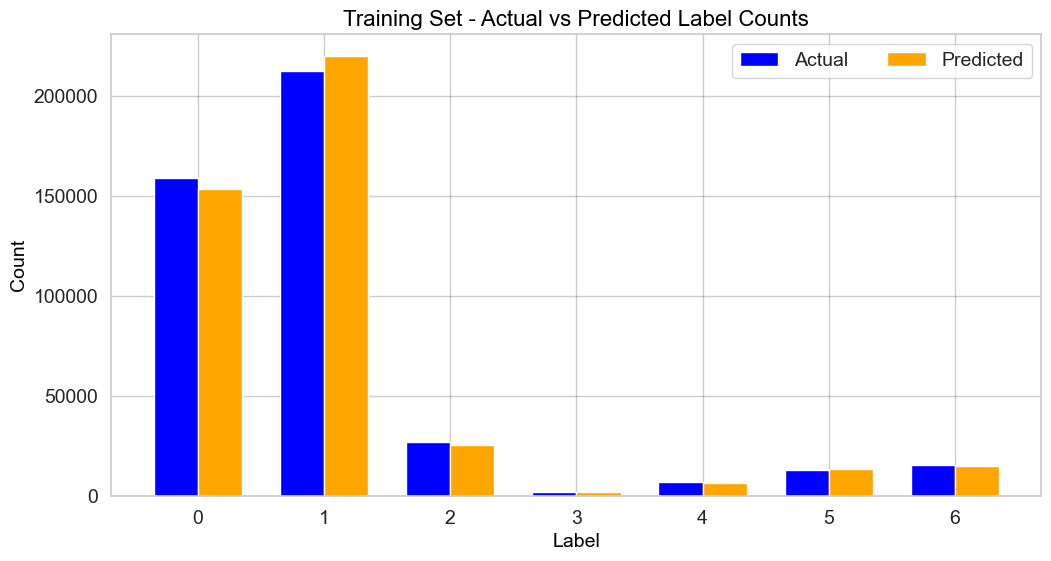

In [19]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts1 = pd.Series(y_train_pred_classes1).value_counts().sort_index()

# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

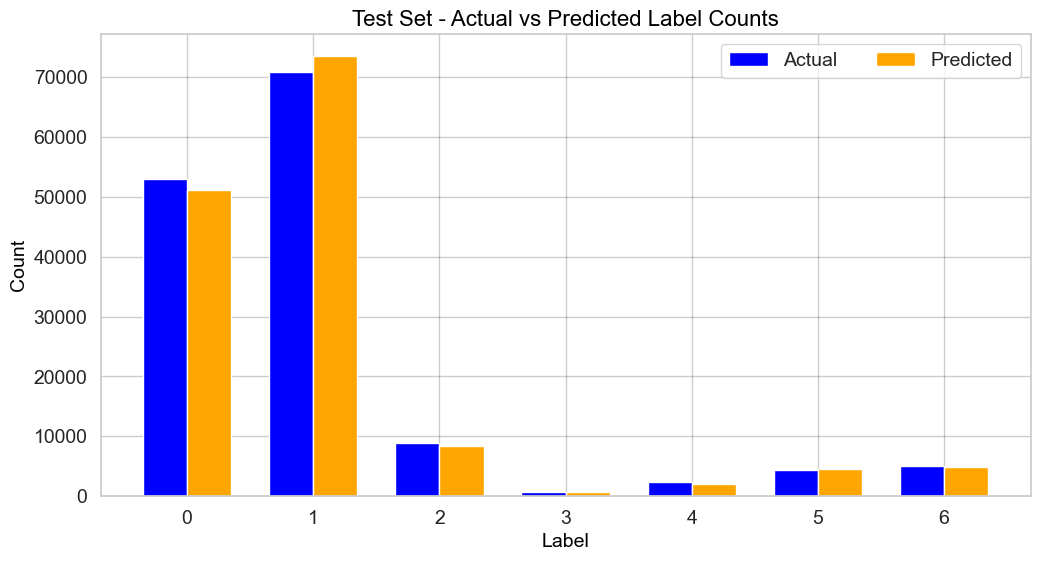

In [20]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts1 = pd.Series(y_test_pred_classes1).value_counts().sort_index()

# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

In [21]:
model1.save('NN_ReLU_ForestCover.h5')

## Tanh Activation Function

In [22]:
# Designing the neural network
model2 = Sequential()
model2.add(Input(shape=(X_train.shape[1],)))
model2.add(Dense(256, activation='tanh'))
model2.add(Dense(128, activation='tanh'))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(7, activation='softmax'))

In [23]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model2.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=100, batch_size=512, verbose=1)

Epoch 1/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7043 - loss: 0.7504 - val_accuracy: 0.7817 - val_loss: 0.5085
Epoch 2/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7991 - loss: 0.4759 - val_accuracy: 0.8283 - val_loss: 0.4129
Epoch 3/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8375 - loss: 0.3923 - val_accuracy: 0.8539 - val_loss: 0.3579
Epoch 4/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8608 - loss: 0.3409 - val_accuracy: 0.8721 - val_loss: 0.3172
Epoch 5/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8761 - loss: 0.3074 - val_accuracy: 0.8810 - val_loss: 0.2938
Epoch 6/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8880 - loss: 0.2773 - val_accuracy: 0.8894 - val_loss: 0.2725
Epoch 7/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8959 - loss: 0.2579 - val_accuracy: 0.8968 - val_loss: 0.2576
Epoch 8/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9031 - loss: 0.2416 - val_accu

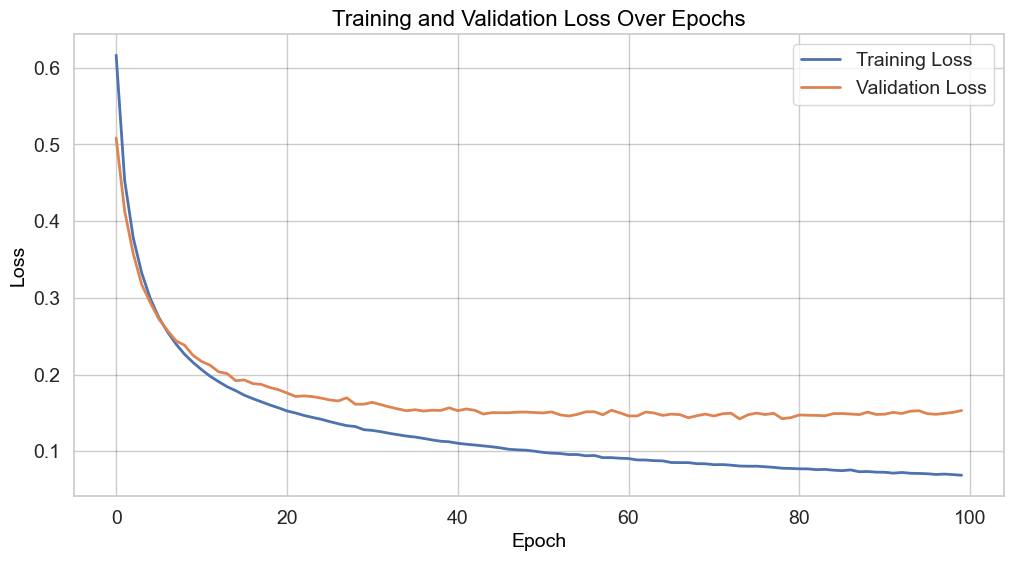

In [24]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

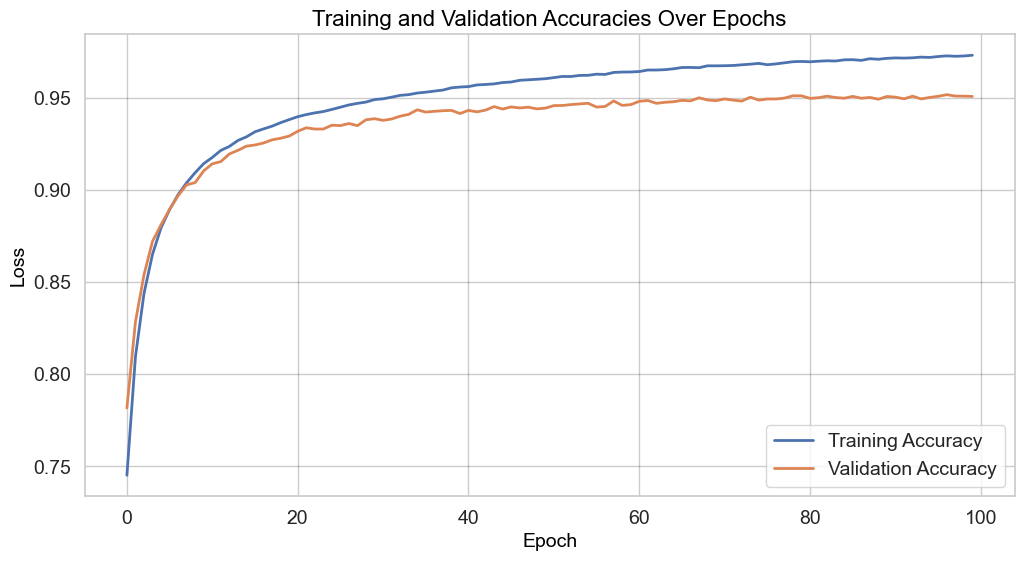

In [25]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [26]:
# Predictions for training and test sets
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

13618/13618 ━━━━━━━━━━━━━━━━━━━━ 8s 560us/step
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 3s 640us/step


In [27]:
# Convert predictions to class labels
y_train_pred_classes2 = y_train_pred2.argmax(axis=1)
y_test_pred_classes2 = y_test_pred2.argmax(axis=1)

# Training metrics
train_accuracy2 = accuracy_score(y_train, y_train_pred_classes2)
train_precision2 = precision_score(y_train, y_train_pred_classes2, average='macro')
train_recall2 = recall_score(y_train, y_train_pred_classes2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred_classes2, average='macro')

# Test metrics
test_accuracy2 = accuracy_score(y_test, y_test_pred_classes2)
test_precision2 = precision_score(y_test, y_test_pred_classes2, average='macro')
test_recall2 = recall_score(y_test, y_test_pred_classes2, average='macro')
test_f1_2 = f1_score(y_test, y_test_pred_classes2, average='macro')

In [28]:
print("Training Accuracy (in %):",round(train_accuracy2*100,3))
print("Training Precision (in %):",round(train_precision2*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall2*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_2*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy2*100,3))
print("Test Precision (in %):",round(test_precision2*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall2*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_2*100,3)) # type: ignore

Training Accuracy (in %): 96.864
Training Precision (in %): 95.259
Training Recall (in %): 93.779
Training F1 Score (in %): 94.475

Test Accuracy (in %): 95.014
Test Precision (in %): 91.932
Test Recall (in %): 90.576
Test F1 Score (in %): 91.204


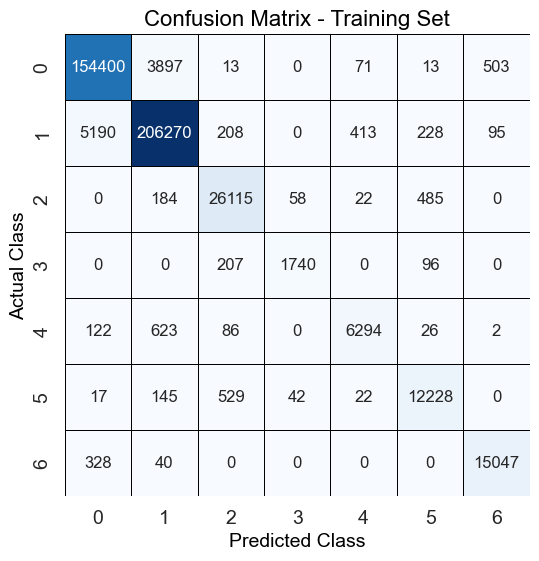

In [29]:
# Confusion matrix for training set
train_conf_matrix2 = confusion_matrix(y_train, y_train_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

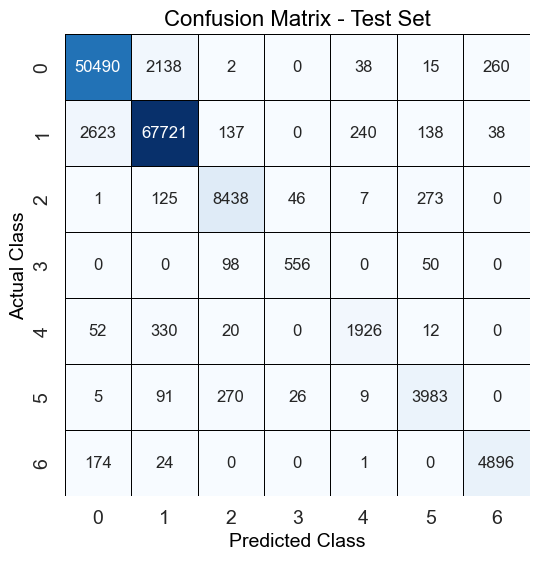

In [30]:
# Confusion matrix for test set
test_conf_matrix2 = confusion_matrix(y_test, y_test_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

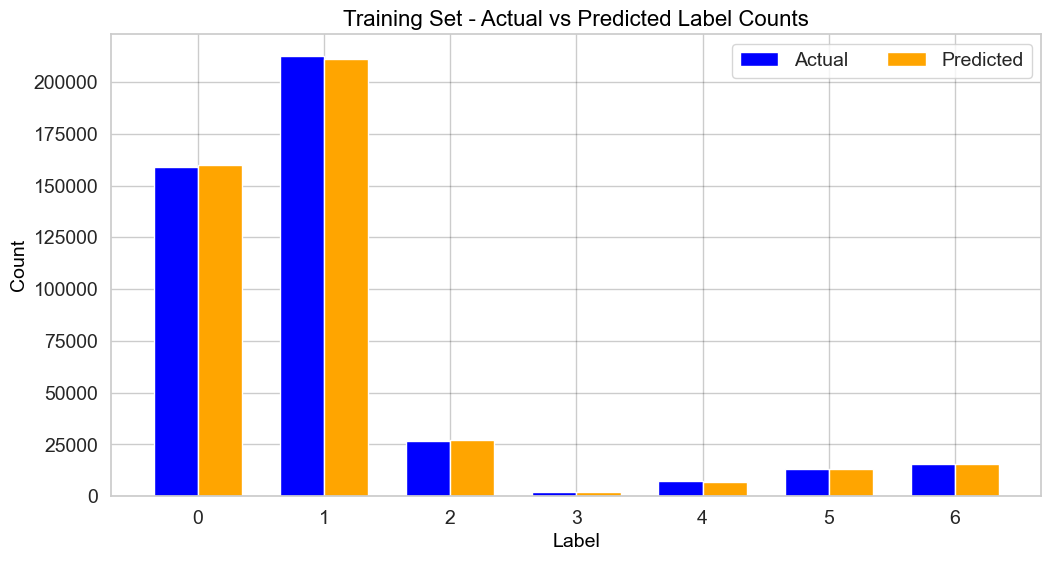

In [31]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts2 = pd.Series(y_train_pred_classes2).value_counts().sort_index()

# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

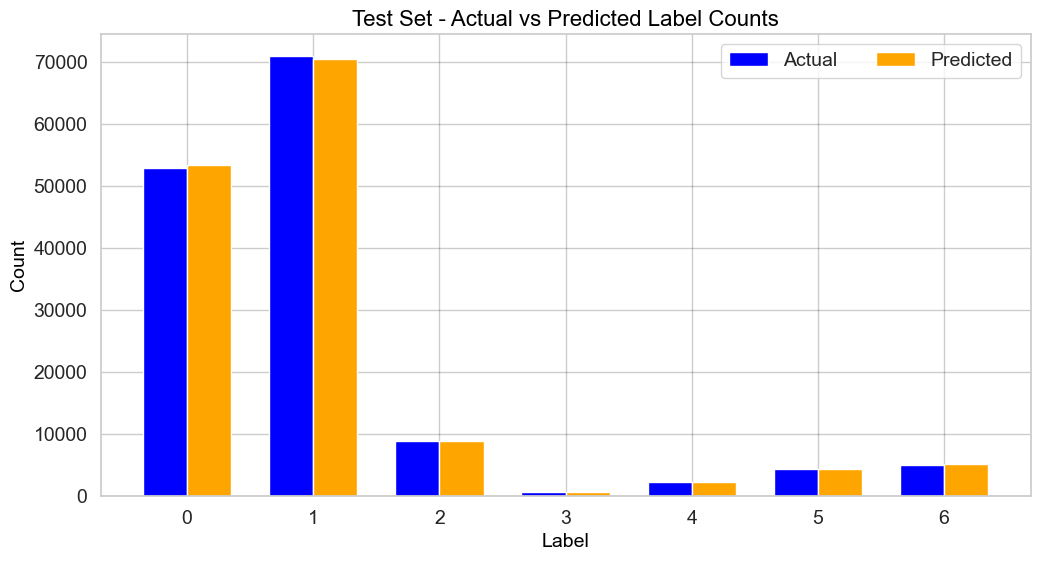

In [32]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts2 = pd.Series(y_test_pred_classes2).value_counts().sort_index()

# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

In [33]:
model2.save('NN_Tanh_ForestCover.h5')

## Sigmoid Activation Function

In [42]:
# Designing the neural network
model3 = Sequential()
model3.add(Input(shape=(X_train.shape[1],)))
model3.add(Dense(256, activation='sigmoid'))
model3.add(Dense(128, activation='sigmoid'))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(7, activation='softmax'))

In [43]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model3.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=100, batch_size=512, verbose=1)

Epoch 1/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5404 - loss: 1.1320 - val_accuracy: 0.7142 - val_loss: 0.7057
Epoch 2/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7163 - loss: 0.6896 - val_accuracy: 0.7289 - val_loss: 0.6599
Epoch 3/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7307 - loss: 0.6485 - val_accuracy: 0.7419 - val_loss: 0.6193
Epoch 4/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7453 - loss: 0.6099 - val_accuracy: 0.7548 - val_loss: 0.5878
Epoch 5/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7568 - loss: 0.5767 - val_accuracy: 0.7581 - val_loss: 0.5720
Epoch 6/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7678 - loss: 0.5521 - val_accuracy: 0.7754 - val_loss: 0.5365
Epoch 7/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7784 - loss: 0.5252 - val_accuracy: 0.7834 - val_loss: 0.5133
Epoch 8/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7879 - loss: 0.5051 - val_accu

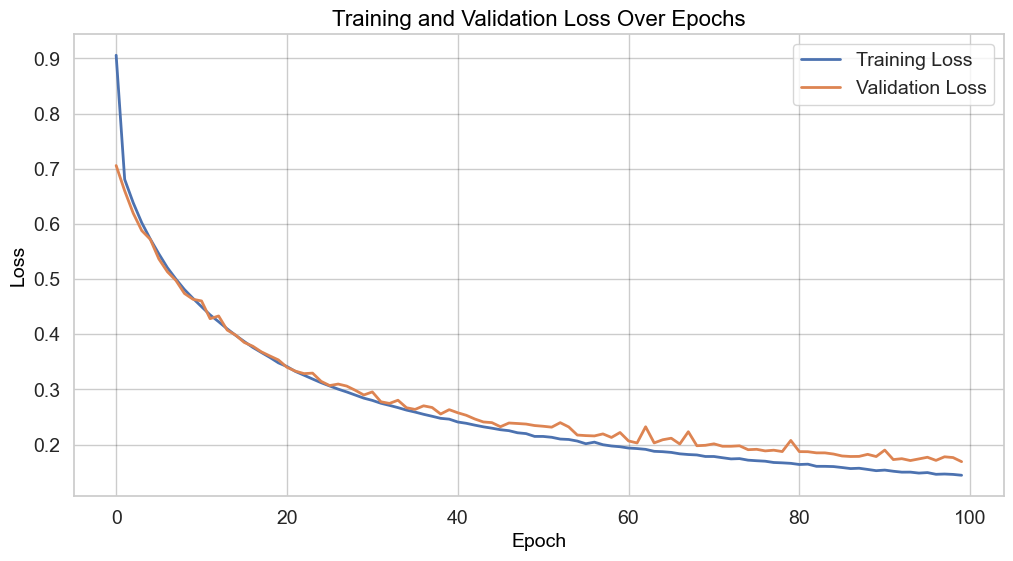

In [44]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

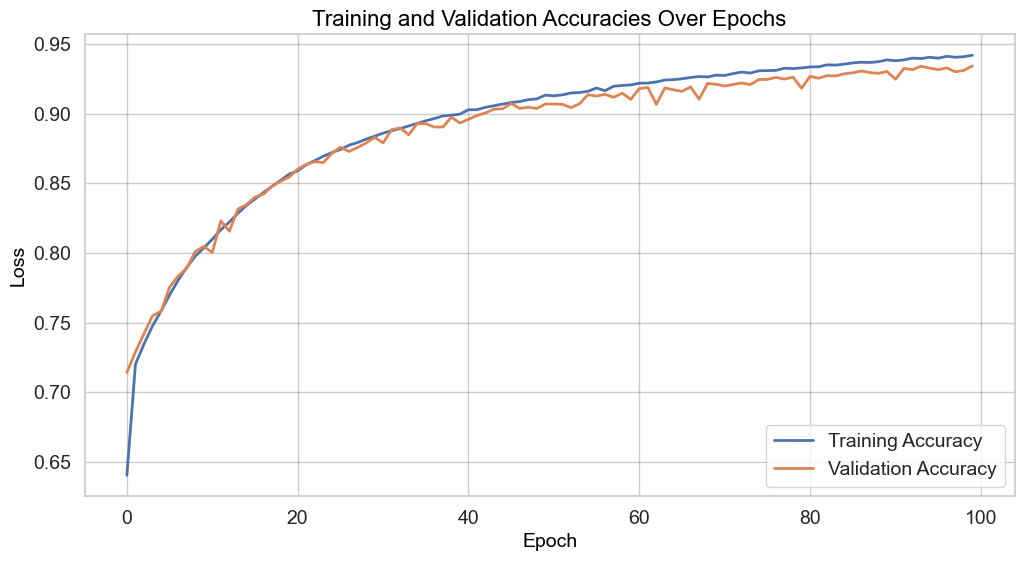

In [45]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [46]:
# Predictions for training and test sets
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

13618/13618 ━━━━━━━━━━━━━━━━━━━━ 9s 646us/step
4540/4540 ━━━━━━━━━━━━━━━━━━━━ 3s 647us/step


In [47]:
# Convert predictions to class labels
y_train_pred_classes3 = y_train_pred3.argmax(axis=1)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Training metrics
train_accuracy3 = accuracy_score(y_train, y_train_pred_classes3)
train_precision3 = precision_score(y_train, y_train_pred_classes3, average='macro')
train_recall3 = recall_score(y_train, y_train_pred_classes3, average='macro')
train_f1_3 = f1_score(y_train, y_train_pred_classes3, average='macro')

# Test metrics
test_accuracy3 = accuracy_score(y_test, y_test_pred_classes3)
test_precision3 = precision_score(y_test, y_test_pred_classes3, average='macro')
test_recall3 = recall_score(y_test, y_test_pred_classes3, average='macro')
test_f1_3 = f1_score(y_test, y_test_pred_classes3, average='macro')

In [48]:
print("Training Accuracy (in %):",round(train_accuracy3*100,3))
print("Training Precision (in %):",round(train_precision3*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall3*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_3*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy3*100,3))
print("Test Precision (in %):",round(test_precision3*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall3*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_3*100,3)) # type: ignore

Training Accuracy (in %): 94.29
Training Precision (in %): 92.1
Training Recall (in %): 90.649
Training F1 Score (in %): 91.356

Test Accuracy (in %): 93.471
Test Precision (in %): 90.658
Test Recall (in %): 89.175
Test F1 Score (in %): 89.896


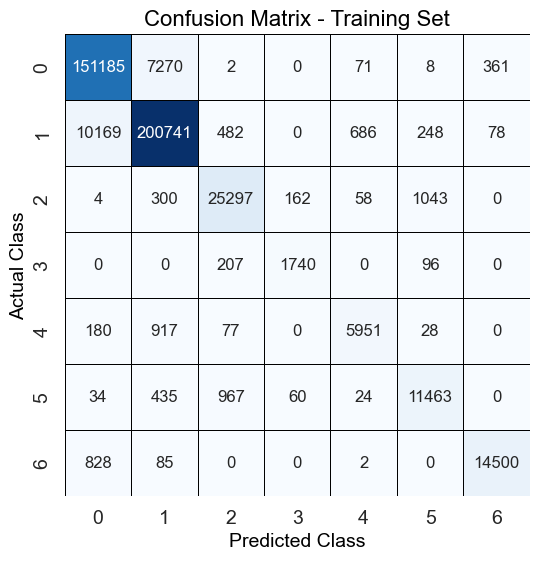

In [49]:
# Confusion matrix for training set
train_conf_matrix3 = confusion_matrix(y_train, y_train_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

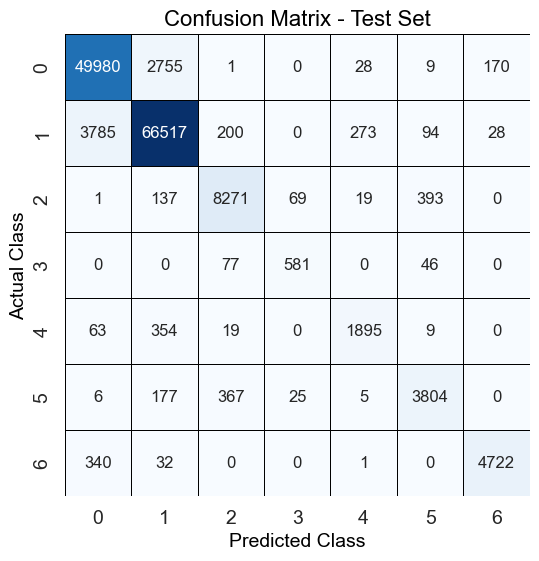

In [50]:
# Confusion matrix for test set
test_conf_matrix3 = confusion_matrix(y_test, y_test_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

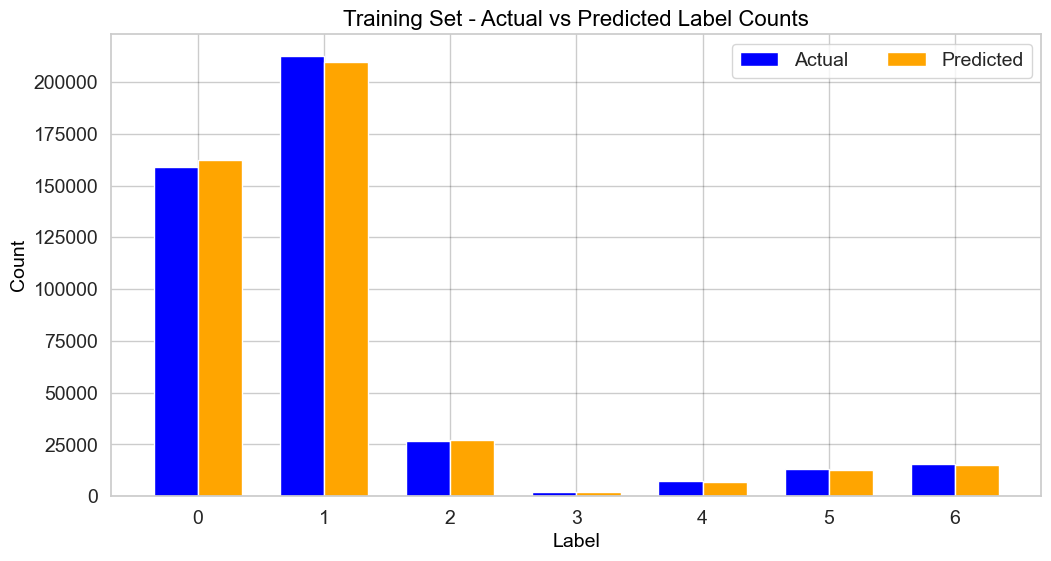

In [51]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts3 = pd.Series(y_train_pred_classes3).value_counts().sort_index()

# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

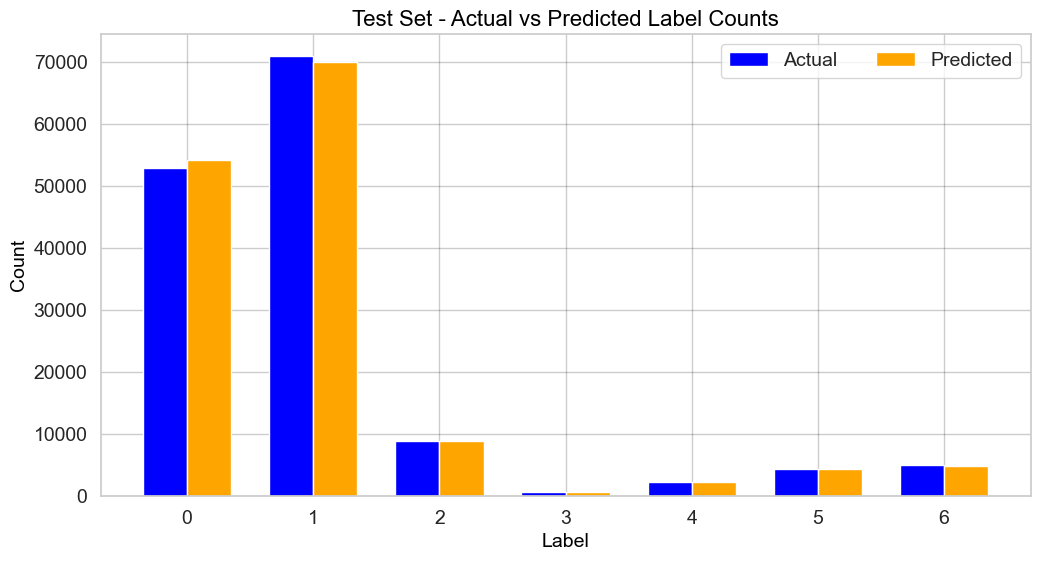

In [52]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts3 = pd.Series(y_test_pred_classes3).value_counts().sort_index()

# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

In [53]:
model3.save('NN_Sigmoid_ForestCover.h5')

In [2]:
from keras.models import load_model # type: ignore

md1 = load_model('NN_ReLU_ForestCover.h5')
md2 = load_model('NN_Tanh_ForestCover.h5')
md3 = load_model('NN_Sigmoid_ForestCover.h5')

In [3]:
md1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,545 (224.79 KB)

 Trainable params: 57,543 (224.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
md2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,545 (224.79 KB)

 Trainable params: 57,543 (224.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [5]:
md3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,545 (224.79 KB)

 Trainable params: 57,543 (224.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

***